## Agenda

- Tokenization
- Stemming
- Lemmatization
    - Pattern
    - TextBlob
- POS Tagging
    - Pattern
    - TextBlob
- Stop Word removal

## Tokenizer
- Wie splittet man einfach einen Satz in Wörter auf?
- https://www.admin.ch/opc/de/classified-compilation/19995395/index.html#a8

In [3]:
import nltk
from nltk.tokenize import word_tokenize

In [5]:
verfassung = '''
Im Namen Gottes des Allmächtigen!

Das Schweizervolk und die Kantone,

in der Verantwortung gegenüber der Schöpfung,

im Bestreben, den Bund zu erneuern, um Freiheit und Demokratie, Unabhängigkeit und Frieden in Solidarität und Offenheit gegenüber der Welt zu stärken,

im Willen, in gegenseitiger Rücksichtnahme und Achtung ihre Vielfalt in der Einheit zu leben,

im Bewusstsein der gemeinsamen Errungenschaften und der Verantwortung gegenüber den künftigen Generationen,

gewiss, dass frei nur ist, wer seine Freiheit gebraucht, und dass die Stärke des Volkes sich misst am Wohl der Schwachen,

geben sich folgende Verfassung:
'''

In [9]:
verfassung = verfassung.decode('utf-8')
verfassung

u'\nIm Namen Gottes des Allm\xe4chtigen!\n\nDas Schweizervolk und die Kantone,\n\nin der Verantwortung gegen\xfcber der Sch\xf6pfung,\n\nim Bestreben, den Bund zu erneuern, um Freiheit und Demokratie, Unabh\xe4ngigkeit und Frieden in Solidarit\xe4t und Offenheit gegen\xfcber der Welt zu st\xe4rken,\n\nim Willen, in gegenseitiger R\xfccksichtnahme und Achtung ihre Vielfalt in der Einheit zu leben,\n\nim Bewusstsein der gemeinsamen Errungenschaften und der Verantwortung gegen\xfcber den k\xfcnftigen Generationen,\n\ngewiss, dass frei nur ist, wer seine Freiheit gebraucht, und dass die St\xe4rke des Volkes sich misst am Wohl der Schwachen,\n\ngeben sich folgende Verfassung:\n'

### In einzelne Wörter + Zeichen

In [11]:
tokens = nltk.word_tokenize(verfassung)
tokens[0:10]

[u'Im',
 u'Namen',
 u'Gottes',
 u'des',
 u'Allm\xe4chtigen',
 u'!',
 u'Das',
 u'Schweizervolk',
 u'und',
 u'die']

### In Wörter

In [16]:
from nltk.tokenize import word_tokenize
words = word_tokenize(verfassung)
words=[word.lower() for word in words if word.isalpha()]
words[0:20]

[u'im',
 u'namen',
 u'gottes',
 u'des',
 u'allm\xe4chtigen',
 u'das',
 u'schweizervolk',
 u'und',
 u'die',
 u'kantone',
 u'in',
 u'der',
 u'verantwortung',
 u'gegen\xfcber',
 u'der',
 u'sch\xf6pfung',
 u'im',
 u'bestreben',
 u'den',
 u'bund']

### Hier noch ein paar praktische Python funktionen wie isalpha

|  s.startswith(t) | test if s starts with t |
|  ------ | ------ |
|  s.endswith(t) | test if s ends with t |
|  t in s | test if t is a substring of s |
|  s.islower() | test if s contains cased characters and all are lowercase |
|  s.isupper() | test if s contains cased characters and all are uppercase |
|  s.isalpha() | test if s is non-empty and all characters in s are alphabetic |
|  s.isalnum() | test if s is non-empty and all characters in s are alphanumeric |
|  s.isdigit() | test if s is non-empty and all characters in s are digits |
|  s.istitle() | test if s contains cased characters and is titlecased (i.e. all words in s have initial capitals) |

### In Sätze

In [17]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(verfassung)
sentences

[u'\nIm Namen Gottes des Allm\xe4chtigen!',
 u'Das Schweizervolk und die Kantone,\n\nin der Verantwortung gegen\xfcber der Sch\xf6pfung,\n\nim Bestreben, den Bund zu erneuern, um Freiheit und Demokratie, Unabh\xe4ngigkeit und Frieden in Solidarit\xe4t und Offenheit gegen\xfcber der Welt zu st\xe4rken,\n\nim Willen, in gegenseitiger R\xfccksichtnahme und Achtung ihre Vielfalt in der Einheit zu leben,\n\nim Bewusstsein der gemeinsamen Errungenschaften und der Verantwortung gegen\xfcber den k\xfcnftigen Generationen,\n\ngewiss, dass frei nur ist, wer seine Freiheit gebraucht, und dass die St\xe4rke des Volkes sich misst am Wohl der Schwachen,\n\ngeben sich folgende Verfassung:']

## Stemming
- d.h. das überführen von Wörtern in den gleichen Stamm. 
- Übliche Probleme die Sprache so mit sich bringt:
    - Deklination: gehe, gehst, gehen, geht, ... es handelt sich um das gleiche Wort. 
    - Plural, Groß/Kleinschreibung: katze, katzen, Katze ... es handelt sich auch um das gleiche Wort. 

In [19]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

### Porter stemmer
- geht ganz ok für Englisch
- https://de.wikipedia.org/wiki/Porter-Stemmer-Algorithmus

In [33]:
from nltk.corpus import udhr
engl_words = udhr.words("English-Latin1")
engl_words[0:20]

[u'Universal',
 u'Declaration',
 u'of',
 u'Human',
 u'Rights',
 u'Preamble',
 u'Whereas',
 u'recognition',
 u'of',
 u'the',
 u'inherent',
 u'dignity',
 u'and',
 u'of',
 u'the',
 u'equal',
 u'and',
 u'inalienable',
 u'rights',
 u'of']

In [32]:
[porter.stem(w) for w in engl_words][0:20]

[u'univers',
 u'declar',
 u'of',
 u'human',
 u'right',
 u'preambl',
 u'wherea',
 u'recognit',
 u'of',
 u'the',
 u'inher',
 u'digniti',
 u'and',
 u'of',
 u'the',
 u'equal',
 u'and',
 u'inalien',
 u'right',
 u'of']

### Lancaster Stemmer
- kommt zu leicht anderen "stämmen"
- funktioniert nicht so gut für deutsch

In [34]:
[lancaster.stem(w) for w in engl_words][0:20]

[u'univers',
 u'decl',
 u'of',
 u'hum',
 u'right',
 u'preambl',
 u'wherea',
 u'recognit',
 u'of',
 u'the',
 u'inh',
 u'dign',
 u'and',
 u'of',
 u'the',
 u'eq',
 u'and',
 u'ina',
 u'right',
 u'of']

### Snowball stemmer
- Geht gut für deusch
- http://snowball.tartarus.org/algorithms/german/stemmer.html

In [23]:
snowball = nltk.stem.snowball.GermanStemmer()

In [24]:
[snowball.stem(w) for w in words][0:20]

[u'im',
 u'nam',
 u'gott',
 u'des',
 u'allmacht',
 u'das',
 u'schweizervolk',
 u'und',
 u'die',
 u'kanton',
 u'in',
 u'der',
 u'verantwort',
 u'gegenub',
 u'der',
 u'schopfung',
 u'im',
 u'bestreb',
 u'den',
 u'bund']

## Lemmatizer
- Zurückführen des Textes zu "Wörterbuchdefinitionen"

In [59]:
text = "Women in technology areas are amazing at coding. Especially one woman is great, her name is Ursula Burns."
words = word_tokenize(text.decode("UTF-8"))
words_engl =[word.lower() for word in words if word.isalpha()]

In [61]:
nltk.download('wordnet')
from nltk import WordNetLemmatizer

lemma = nltk.WordNetLemmatizer() 
lemmas = [lemma.lemmatize(i) for i in words_engl]
lemmas[0:10]

[nltk_data] Downloading package wordnet to /Users/plotti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[u'woman',
 u'in',
 u'technology',
 u'area',
 u'are',
 u'amazing',
 u'at',
 u'coding',
 u'especially',
 u'one']

### Lematizer Deutsch NLTK
- Geht leider nicht für deusch :( in nltk

In [124]:
party_text = '''
Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. 
'''
party_text = party_text.decode("UTF-8")
words = word_tokenize(party_text)
words_german =[word.lower() for word in words if word.isalpha()]

In [122]:
lemma = nltk.WordNetLemmatizer() 
lemmas = [lemma.lemmatize(i) for i in words_german]
lemmas[0:20]

[u'kurz',
 u'vor',
 u'uhr',
 u'sind',
 u'patrouillen',
 u'der',
 u'stadtpolizei',
 u'in',
 u'alle',
 u'richtungen',
 u'aber',
 u'vor',
 u'allem',
 u'in',
 u'richtung',
 u'kreis',
 u'ausger\xfcckt',
 u'grund',
 u'war',
 u'eine']

## Lemmatizer in Pattern
- Ähnlich wie NLTK funktioniert aber auch für deutsch
- https://www.clips.uantwerpen.be/pattern
- ```pip install pattern```
- Deutsche modelle kommen übrigens von der Uni Zürich https://www.zora.uzh.ch/id/eprint/28579/

In [72]:
from pattern.de import parse

In [110]:
text = "Richtungen Richtung."
s = parse(text, relations=True, lemmata=True)
s

'Richtungen/JJ/B-NP/O/O/richtung Richtung/NN/I-NP/O/O/richtung ././O/O/O/.'

In [136]:
lemmata = []
from pattern.de import parsetree
s = parsetree(party_text,relations=True, lemmata=True) 
for sentence in s: 
    for chunk in sentence.chunks:
        for word in chunk.words:
            #print("%s (%s)" %(word,word.lemma))
            lemmata.append(word.lemma)
lemmata[0:20]

['kurz',
 'vor',
 '22.00',
 'uhr',
 'sein',
 'polizist',
 'der',
 'stadtpolizei',
 'in',
 'all',
 'richtungen',
 'aber',
 'vor',
 'in',
 'richtung',
 'kreis',
 '9',
 'ausger\xfcckt',
 'grund',
 'sein']

## Lemmatizer in Textblob
 - https://textblob.readthedocs.io/en/dev/quickstart.html
 - ```pip install -U textblob-de```
 - https://github.com/markuskiller/textblob-de

In [137]:
from textblob_de import TextBlobDE
from textblob_de import PatternParser
blob = TextBlobDE(party_text, parser=PatternParser(pprint=False, lemmata=True))
blob.parse()
list(blob.words.lemmatize())[0:20]

[u'kurz',
 u'vor',
 u'22.00',
 u'Uhr',
 u'sein',
 u'Polizist',
 u'der',
 u'Stadtpolizei',
 u'in',
 u'all',
 u'Richtungen',
 u'aber',
 u'vor',
 u'all',
 u'in',
 u'Richtung',
 u'Kreis',
 u'9',
 u'ausger\xfcckt',
 u'Grund']

## POS Tagging (Part of Speech Tagging)
- Ich bin nur interessiert an substantiven oder adjektiven oder verben. 
- Wie kann ich nur diese filtern? 
- Funktioniert für Deutsch nicht auf Anhieb in NLTK :(
- aber gut in pattern und textblob

## Übersicht
https://www.clips.uantwerpen.be/pages/mbsp-tags

|  Tag | Description | Example |
|  ------ | ------ | ------ |
|  **CC** | conjunction, coordinating | and, or, but |
|  **CD** | cardinal number | five, three, 13% |
|  **DT** | determiner | the, a, these |
|  **EX** | existential there | there were six boys |
|  **FW** | foreign word | mais |
|  **IN** | conjunction, subordinating or preposition | of, on, before, unless |
|  **JJ** | adjective | nice, easy |
|  **JJR** | adjective, comparative | nicer, easier |
|  **JJS** | adjective, superlative | nicest, easiest |
|  **LS** | list item marker |  |
|  **MD** | verb, modal auxillary | may, should |
|  **NN** | noun, singular or mass | tiger, chair, laughter |
|  **NNS** | noun, plural | tigers, chairs, insects |
|  **NNP** | noun, proper singular | Germany, God, Alice |
|  **NNPS** | noun, proper plural | we met two Christmases ago |
|  **PDT** | predeterminer | both his children |
|  **POS** | possessive ending | s |
|  **PRP** | pronoun, personal | me, you, it |
|  **PRP** | pronoun, possessive | my, your, our |
|  **RB** | adverb | extremely, loudly, hard |
|  **RBR** | adverb, comparative | better |
|  **RBS** | adverb, superlative | best |
|  **RP** | adverb, particle | about, off, up |
|  **SYM** | symbol | % |
|  **TO** | infinitival to | what to do? |
|  **UH** | interjection | oh, oops, gosh |
|  **VB** | verb, base form | think |
|  **VBZ** | verb, 3rd person singular present | she thinks |
|  **VBP** | verb, non-3rd person singular present | I think |
|  **VBD** | verb, past tense | they thought |
|  **VBN** | verb, past participle | a sunken ship |
|  **VBG** | verb, gerund or present participle | thinking is fun |
|  **WDT** | wh-determiner | which, whatever, whichever |
|  **WP** | wh-pronoun, personal | what, who, whom |
|  **WP** | wh-pronoun, possessive | whose, whosever |
|  **WRB** | wh-adverb | where, when |
|  **.** | punctuation mark, sentence closer | .;?* |
|  **,** | punctuation mark, comma | , |
|  **:** | punctuation mark, colon | : |
|  **(** | contextual separator, left paren | ( |
|  **)** | contextual separator, right paren | ) |

### POS Tags in pattern

In [143]:
verben = []
substantive = []
adjektive = []
from pattern.de import parsetree
s = parsetree(party_text,relations=True, lemmata=True) 
for sentence in s: 
    for chunk in sentence.chunks:
        for word in chunk.words:
            if "V" in word.type:
                verben.append(word)
            if "NN" in word.type:
                substantive.append(word)
            if "J" in word.type:
                adjektive.append(word)

In [144]:
verben

[Word(u'sind/VB'), Word(u'war/VB'), Word(u'geraten/VBN'), Word(u'sei/VB')]

In [145]:
substantive

[Word(u'Uhr/NN'),
 Word(u'Polizisten/NNS'),
 Word(u'Stadtpolizei/NN'),
 Word(u'Richtungen/NN'),
 Word(u'Richtung/NN'),
 Word(u'Kreis/NN'),
 Word(u'ausger\xfcckt/NN'),
 Word(u'Meldung/NN'),
 Word(u'Party/NN'),
 Word(u'Aargauerstrasse/NNP'),
 Word(u'Kontrolle/NN')]

In [146]:
adjektive

[Word(u'Kurz/JJ'),
 Word(u'alle/JJ'),
 Word(u'privaten/JJ'),
 Word(u'angeblich/JJ')]

### POS tags in textblob

In [153]:
substantive = []
adjektive = []
verben = []
blob = TextBlobDE(party_text, parser=PatternParser(pprint=False, lemmata=True))
for word in blob.tags:
    if "NN" in word[1]:
        substantive.append(word[0])
    if "V" in word[1]:
        verben.append(word[0])
    if "JJ" in word[1]:
        adjektive.append(word[0])

In [154]:
substantive

['Uhr',
 'Polizisten',
 'Stadtpolizei',
 'Richtungen',
 'Richtung',
 'Kreis',
 'ausger\xfcckt',
 'Grund',
 'Meldung',
 'Party',
 'Aargauerstrasse',
 'Kontrolle']

In [155]:
adjektive

['Kurz', 'alle', 'privaten', 'angeblich']

In [156]:
verben

['sind', 'war', 'geraten', 'sei']

## Stop word removal


In [165]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/plotti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Englisch

In [164]:
stopwords.words('english')[0:10]

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u"you're"]

In [160]:
filtered_words = [word for word in words_engl if word not in stopwords.words('english')]
filtered_words

[u'women',
 u'technology',
 u'areas',
 u'amazing',
 u'coding',
 u'especially',
 u'one',
 u'woman',
 u'great',
 u'name',
 u'ursula',
 u'burns']

### Deutsch

In [163]:
stopwords.words('german')[0:10]

[u'aber',
 u'alle',
 u'allem',
 u'allen',
 u'aller',
 u'alles',
 u'als',
 u'also',
 u'am',
 u'an']

In [161]:
filtered_words = [word for word in words_german if word not in stopwords.words('german')]
filtered_words

[u'kurz',
 u'uhr',
 u'polizisten',
 u'stadtpolizei',
 u'richtungen',
 u'richtung',
 u'kreis',
 u'ausger\xfcckt',
 u'grund',
 u'meldung',
 u'privaten',
 u'party',
 u'aargauerstrasse',
 u'angeblich',
 u'ausser',
 u'kontrolle',
 u'geraten',
 u'sei']

## Wordle 2.0

- Tokenization
- Lemmatization

In [169]:
text = (" ").join(udhr.words("German_Deutsch-Latin1"))
# tokenize and lemmatize
blob = TextBlobDE(text, parser=PatternParser(pprint=False, lemmata=True))
clean_blob = list(blob.words.lemmatize())

- Numbers etc.. removal
- Stop word removal

In [179]:
words_alpha =[word.lower() for word in clean_blob if word.isalpha()]
stopwords = stopwords.words('german')
stopwords.append("jed")
result = [word for word in words_alpha if word not in stopwords]
result[0:20]

[u'allgemein',
 u'erkl\xe4rung',
 u'menschenrecht',
 u'resolution',
 u'a',
 u'iii',
 u'pr\xe4ambel',
 u'anerkennung',
 u'angeborenen',
 u'gleich',
 u'unver\xe4usserlich',
 u'rechte',
 u'all',
 u'mitglieder',
 u'gemeinschaft',
 u'menschen',
 u'grundlage',
 u'freiheit',
 u'gerechtigkeit',
 u'friede']

In [180]:
text = (" ").join(result)

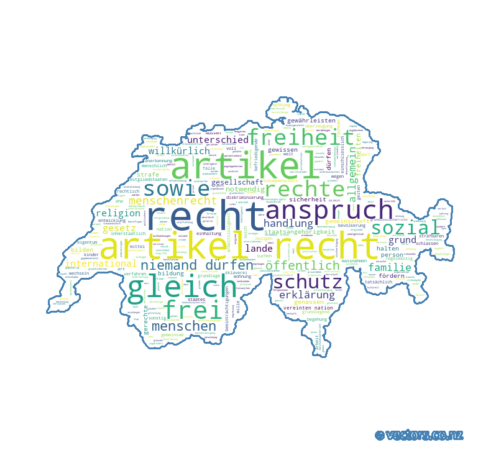

In [181]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from os import path
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

maske = np.array(Image.open(path.join(d, "maske.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=maske, contour_width=3, contour_color='steelblue')
wc.generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()